In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [17]:
df=pd.read_excel('Spotify_data.xlsx')
df


,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,None,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,None,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,None,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,None,None,None,None,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,None,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,None,Story telling,Both,Shorter,Ok
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       520 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

In [18]:
df.isnull().sum()

Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
fav_music_genre                0
music_time_slot                0
music_Influencial_mood         0
music_lis_frequency            0
music_expl_method              0
music_recc_rating              0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64

In [20]:
df.describe()

,music_recc_rating
count,520.000000
mean,3.503846
std,0.979552
min,1.000000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


In [81]:
age_count=df['Age'].value_counts()
age_count
## people between the age of 20-35 are most users on spotify

20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: Age, dtype: int64

In [83]:
df.duplicated().sum()

1

In [86]:
df.drop_duplicates(inplace=True)

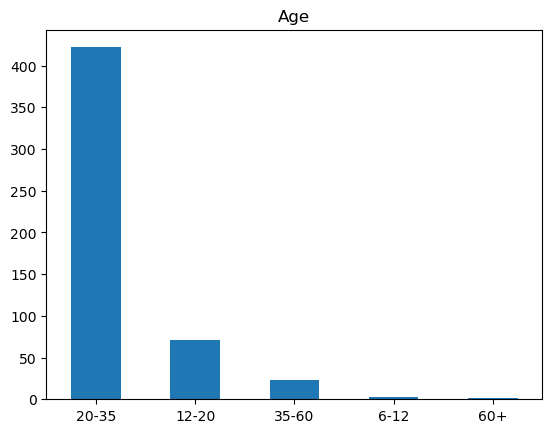

In [82]:
age_count.plot(kind='bar')
plt.xticks(rotation=360)
plt.title('Age')
plt.show()

In [91]:
subscription_count=df['spotify_subscription_plan'].value_counts()
subscription_count
# Most people around 81% use free version with ads and does not use premium account subscription

Free (ad-supported)            423
Premium (paid subscription)     96
Name: spotify_subscription_plan, dtype: int64

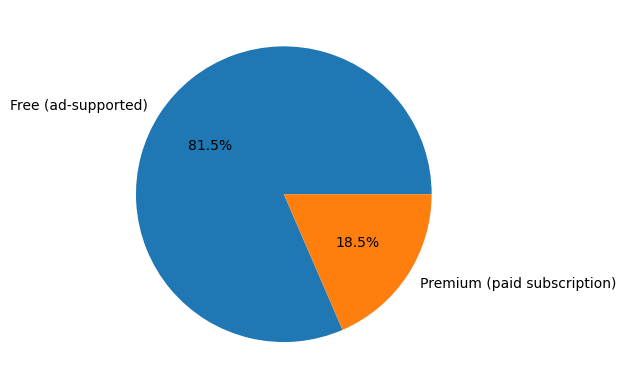

In [104]:
plt.pie(subscription_count,labels=subscription_count.index, autopct = '%1.1f%%')
plt.show()

In [106]:
df['preffered_premium_plan'].value_counts()

None                              207
Individual Plan- Rs 119/ month     95
Student Plan-Rs 59/month           94
Duo plan- Rs 149/month             84
Family Plan-Rs 179/month           39
Name: preffered_premium_plan, dtype: int64

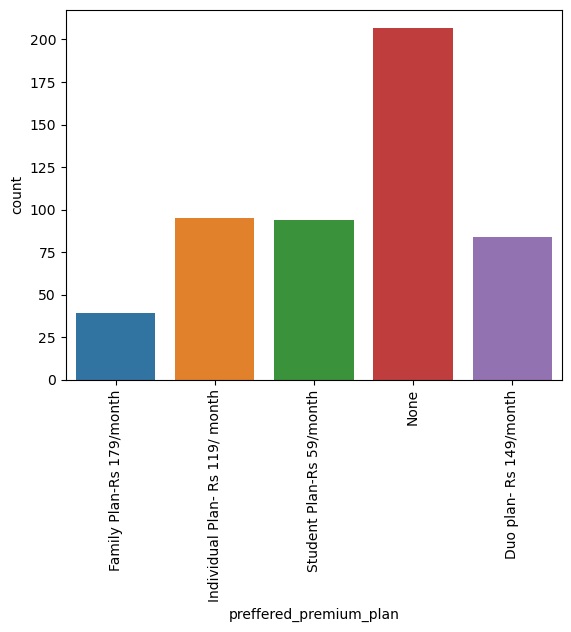

In [119]:
sb.countplot(data=df,x='preffered_premium_plan')
plt.xticks(rotation=90)
plt.show()
# Most users don't want to express their plan but the next most used plan that is common is the Individual plan of Rs119/month.

In [125]:
filtered_data = df[(df['spotify_subscription_plan'] == 'Premium (paid subscription)') & (df['premium_sub_willingness'] == 'Yes')]
filtered_data

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
23,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Smart speakers...",Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,classical,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time","recommendations, Playlists, Radio",1,Rarely,Comedy,Interview,Both,Shorter,Very Satisfied
24,20-35,Male,More than 2 years,"Smartphone, Computer or laptop",Premium (paid subscription),Yes,Family Plan-Rs 179/month,Music,Rock,Night,"Relaxation and stress relief, Sadness or melan...",Study Hours,"recommendations, Radio",3,Rarely,Lifestyle and Health,Conversational,Both,Both,Ok
26,12-20,Male,6 months to 1 year,"Smartphone, Smart speakers or voice assistants",Premium (paid subscription),Yes,Student Plan-Rs 59/month,Podcast,Rap,Morning,Relaxation and stress relief,"Office hours, While Traveling, Workout session",recommendations,4,Several times a week,Lifestyle and Health,Story telling,Both,Longer,Satisfied
49,20-35,Male,1 year to 2 years,"Smartphone, Computer or laptop, Smart speakers...",Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Electronic/Dance,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",recommendations,4,Rarely,Comedy,Story telling,unknown Podcasters,Shorter,Very Satisfied
59,20-35,Male,More than 2 years,"Computer or laptop, Wearable devices",Premium (paid subscription),Yes,Family Plan-Rs 179/month,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time","recommendations, Playlists",5,Never,None,None,None,None,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,20-35,Male,Less than 6 months,Smart speakers or voice assistants,Premium (paid subscription),Yes,Duo plan- Rs 149/month,Music,classical,Morning,Uplifting and motivational,Workout session,Playlists,4,Rarely,Lifestyle and Health,Interview,unknown Podcasters,Both,Satisfied
508,12-20,Female,6 months to 1 year,Wearable devices,Premium (paid subscription),Yes,Duo plan- Rs 149/month,Podcast,Rap,Morning,Relaxation and stress relief,While Traveling,Playlists,2,Rarely,Sports,None,Well known individuals,Both,Ok
510,20-35,Male,More than 2 years,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...",Study Hours,"recommendations, Playlists",5,Rarely,Comedy,Story telling,Both,Longer,Satisfied
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied


In [240]:
df['music_Influencial_mood'].value_counts().head(5)
# Most people listen to music for relaxation and relieving stress

Relaxation and stress relief                                                                                     194
Uplifting and motivational                                                                                        67
Sadness or melancholy                                                                                             55
Relaxation and stress relief, Uplifting and motivational                                                          44
Relaxation and stress relief, Uplifting and motivational, Sadness or melancholy, Social gatherings or parties     35
Name: music_Influencial_mood, dtype: int64

In [204]:
df['spotify_listening_device'].value_counts().head(5)
# Smartphones are most used device for using Spotify.

Smartphone                                                299
Computer or laptop                                         54
Smartphone, Computer or laptop                             48
Smart speakers or voice assistants                         43
Computer or laptop, Smart speakers or voice assistants     14
Name: spotify_listening_device, dtype: int64

In [130]:
top_genres=df['fav_music_genre'].value_counts().head(5)
top_genres
# Users who listen to Melody genre are more in count

Melody              258
classical            87
Pop                  85
Rap                  55
Electronic/Dance     16
Name: fav_music_genre, dtype: int64

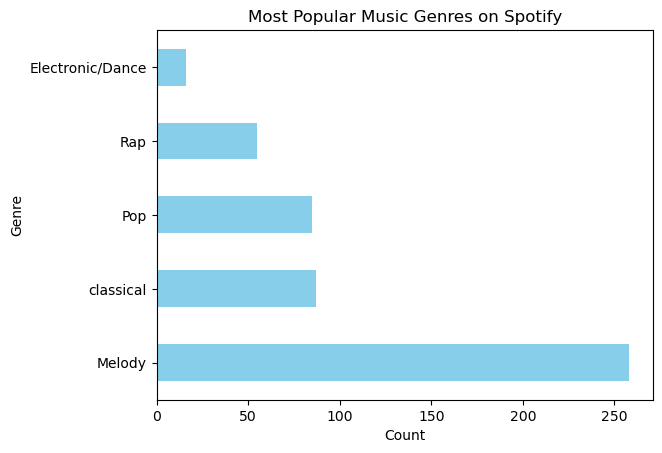

In [133]:
top_genres.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Most Popular Music Genres on Spotify');

In [206]:
df['preferred_listening_content'].value_counts()

Music      409
Podcast    110
Name: preferred_listening_content, dtype: int64

In [147]:
counting=df[['spotify_usage_period']].value_counts()
counting

spotify_usage_period
More than 2 years       169
1 year to 2 years       140
6 months to 1 year      119
Less than 6 months       91
dtype: int64

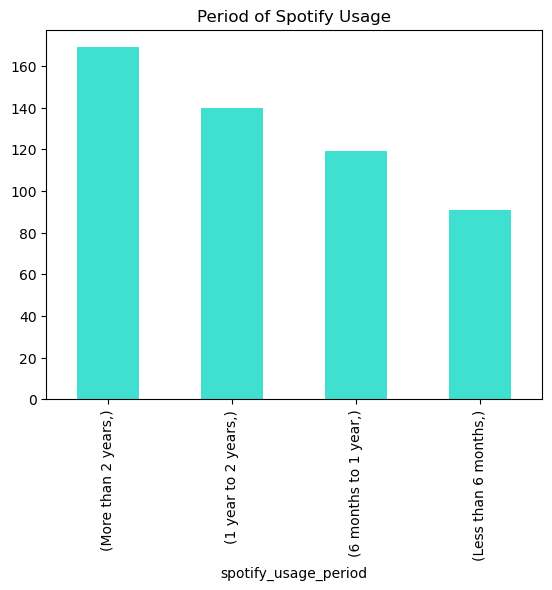

In [197]:
counting.plot(kind='bar', color='turquoise',title='Period of Spotify Usage');
# most users are using spotify for more than 2 years

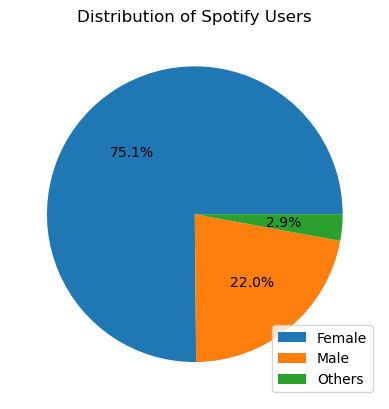

In [156]:
gender_count = df['Gender'].value_counts()
plt.pie(gender_count,autopct='%1.1f%%')
plt.title('Distribution of Spotify Users')
plt.legend(gender_count.index, loc='best');
# Females are using Spotify more than male.

<Axes: xlabel='Age', ylabel='count'>

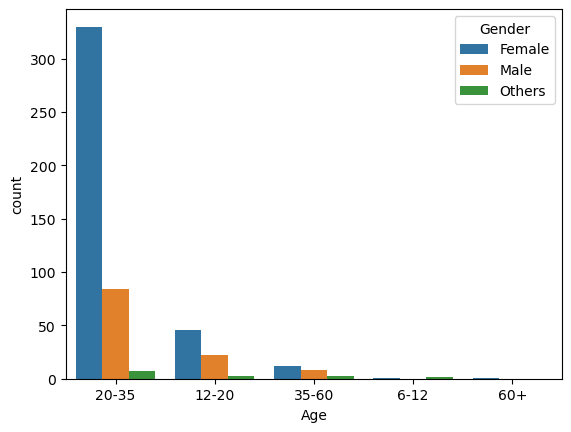

In [161]:
sb.countplot(x='Age',data=df,hue='Gender')
# Even in each age group females are more in using the app

In [200]:
m=df['music_recc_rating'].value_counts()
m

3    190
4    173
5     86
2     56
1     14
Name: music_recc_rating, dtype: int64

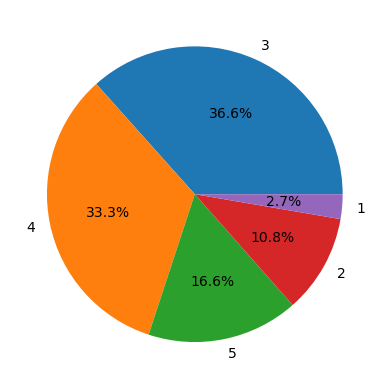

In [203]:
plt.pie(m,labels=m.index,autopct='%1.1f%%');
# 3 is the most rating given to 

In [177]:
x=df['preffered_pod_format'].value_counts()
x

Story telling     152
None              139
Conversational    105
Interview          74
Educational        49
Name: preffered_pod_format, dtype: int64

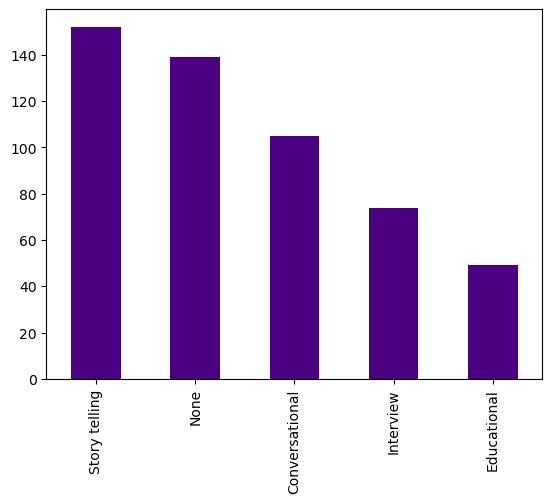

In [227]:
x.plot(kind='bar', color='indigo');
# most users prefer story telling kind of format of podcasts.

In [218]:
a=df['pod_host_preference'].value_counts()
a

Both                      180
None                      140
Well known individuals    114
unknown Podcasters         85
Name: pod_host_preference, dtype: int64

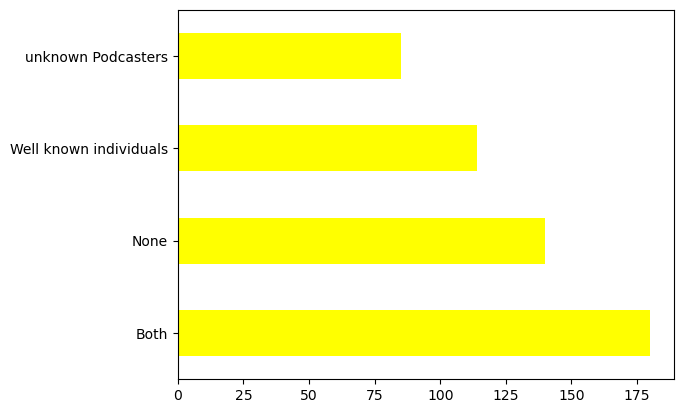

In [220]:
a.plot(kind='barh', color='yellow');
# Most users prefer both well-known individuals and unknown individuals as podcast hosts.

In [183]:
y=df['preffered_pod_duration'].value_counts()
y

Shorter    191
None       128
Both       117
Longer      83
Name: preffered_pod_duration, dtype: int64

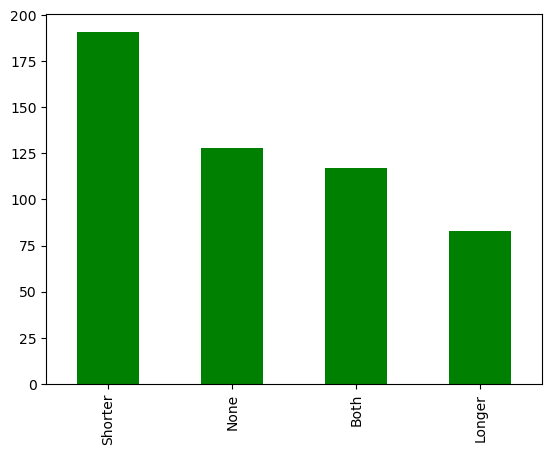

In [223]:
y.plot(kind='bar', color='green');
# shorter duration of posdcast is preferred

In [192]:
z=df['pod_variety_satisfaction'].value_counts()
z

Ok                   279
Satisfied            162
Very Satisfied        48
Dissatisfied          20
Very Dissatisfied     10
Name: pod_variety_satisfaction, dtype: int64

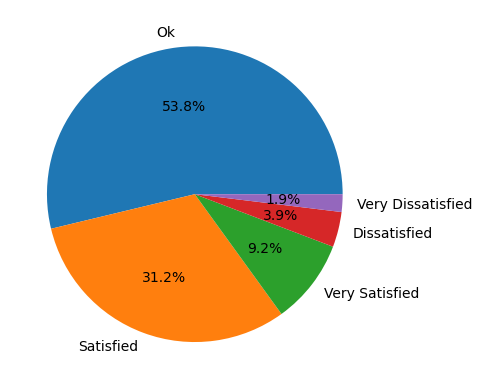

In [225]:
plt.pie(z,labels=z.index,autopct='%1.1f%%');

In [239]:
df['music_lis_frequency'].value_counts().head(5)

# While traveling is the most frequent occasion for music listening.

While Traveling                                   111
leisure time                                       87
While Traveling, leisure time                      64
While Traveling, Workout session, leisure time     48
Workout session                                    33
Name: music_lis_frequency, dtype: int64

In [169]:
df.to_csv(r'C:\Users\reach\Downloads\Preplacement.csv')

In [ ]:
# Final Conclusion

# Maximum number of the users are in the age group of 20-35 and are mostly females.
# Most of the females are using 'free plan' in comparison to 'Male' and 'Others'.
# Most Users prefer to listen to music over podcasts.
# While traveling is the most frequent occasion for music listening.
# Most Users don't prefer a plan.
# Melody Music genre is the most preferred music.
# Most people listen to music for relaxation and relieving stress their mood
# Most of the people listen music/podcast at night.
# Most of the people rate spotify recommendations as '3 out of 5'.
# Podcast listening frequency varies, with the most common frequency being "rarely".
# Many users did not give their fav genre of podcast
# Maximum number of people like shorter podcasts and rate 'ok' for the variety and availability of podcasts. 